<a href="https://colab.research.google.com/github/MarcinBernad/fastaiCourse/blob/main/fastai_rozdzial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konfiguracja środowiska

In [2]:
pip install -Uqq fastbook

In [3]:
import fastbook

In [4]:
from fastbook import *

# Rozdział 1

In [ ]:
from fastai.vision.all import *

In [ ]:
pwd

'/content'

### Pobieranie zdjęć psów i kotów

In [ ]:
path = untar_data(URLs.PETS)/'images'

Trenowanie modelu na gotowym resnet34.

In [ ]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=2022,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.141368,0.021064,0.008796,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.048823,0.030440,0.010825,02:11


Import własne zdjęcia w celu sprawdzenia klasyfikacji modelu.

In [ ]:
uploader = widgets.FileUpload()

In [ ]:
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])

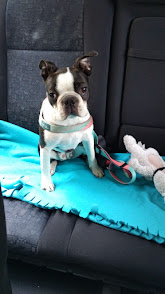

In [ ]:
img

In [ ]:
is_cat,_,probs = learn.predict(img)

In [ ]:
print(f"Czy to jest kot? {is_cat}.")
print(f"Prawdopodobieństwo, że to jest kot: {probs[1].item():.6f}")

Czy to jest kot? False.
Prawdopodobieństwo, że to jest kot: 0.000055


### Recenzje filmów

In [ ]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.469447,0.434506,0.810280,03:35


epoch,train_loss,valid_loss,accuracy,time
0,0.296363,0.241664,0.901680,07:21
1,0.243695,0.207721,0.919480,07:17
2,0.182788,0.190701,0.927000,07:17
3,0.149016,0.187103,0.930680,07:17


In [ ]:
learn.predict('This movie was terrible')

('neg', TensorText(0), TensorText([0.9886, 0.0114]))

In [ ]:
doc(learn.predict)

,Type,Default
item,,
rm_type_tfms,NoneType,``
with_input,bool,False


### Trenowanie modelu na danych tabelarycznych

In [ ]:
from fastai.tabular.all import *

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)

In [ ]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
                                  cat_names=['workclass','education',
                                             'marital-status','occupation',
                                             'relationship','race'],
                                  cont_names=['age','fnlwgt','education-num'],
                                  procs=[Categorify, FillMissing, Normalize])

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.374053,0.372600,0.828471,00:07
1,0.371670,0.362348,0.833999,00:04
2,0.350932,0.359070,0.838145,00:03


### System rekomendacyjny
Polecanie filmów na podstawie historii

In [ ]:
from fastai.collab import *

In [ ]:
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [ ]:
learn = collab_learner(dls, y_range=(0.5, 5.5))

In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510421,1.409248,00:00


epoch,train_loss,valid_loss,time
0,1.378706,1.353837,00:00
1,1.283051,1.182615,00:00
2,1.051507,0.870182,00:00
3,0.827181,0.705093,00:00
4,0.702141,0.661779,00:00
5,0.646693,0.647653,00:00
6,0.621587,0.642445,00:00
7,0.605313,0.639461,00:00
8,0.602502,0.638560,00:00
9,0.606968,0.638429,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,79.0,83.0,4.5,4.650622
1,49.0,77.0,5.0,4.435779
2,64.0,51.0,4.0,4.211000
3,98.0,7.0,5.0,4.833302
4,1.0,45.0,4.0,3.840652
5,86.0,48.0,3.0,3.797843
6,8.0,84.0,4.5,4.272635
7,93.0,71.0,3.0,4.155020
8,35.0,16.0,4.0,3.304728


### Segmentacja obrazów

In [ ]:
path = untar_data(URLs.CAMVID_TINY)

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/'images'),
    label_func=lambda x: path/'labels'/f'{x.stem}_P{x.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [ ]:
learn = unet_learner(dls, resnet34)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.791352,2.475053,00:03


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,1.696525,1.439192,00:04
1,1.557295,1.486338,00:03
2,1.457017,1.215241,00:03
3,1.319104,1.018589,00:03
4,1.202802,0.895615,00:03
5,1.092066,0.799719,00:04
6,0.999271,0.787740,00:03
7,0.926988,0.768732,00:03


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


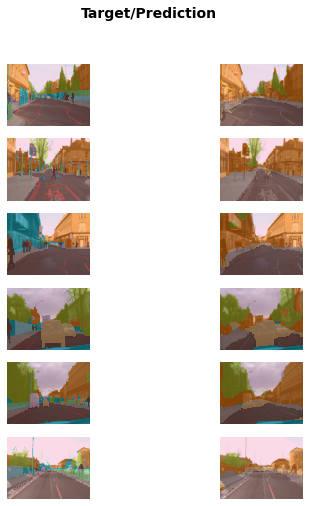

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

# Rozdział 2

### Projekt

#### Pobieranie obrazów do projektu
1. Rejestracja w serwisie Microsoft Azure i pobranie klucza

In [1]:
# microsort bing search key
key = '594e085068a443cf8bde633be12afdb7'

In [37]:
results = search_images_bing(key, 'boston-terriers')

In [38]:

ims = results.attrgot('contentUrl')

In [39]:
results

(#150) [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=boston-terriers&id=C4A5550AADAA8D3C95EA968875907BA13D7CE1CC&simid=608044176832673158', 'name': 'The Boston Terrier Price: Is He Really the Right Dog for You?', 'thumbnailUrl': 'https://tse1.mm.bing.net/th?id=OIP.7hRDj122Ra8luuRfv01RzgHaJ4&pid=Api', 'datePublished': '2020-01-14T02:04:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://dogtemperament.com/wp-content/uploads/2020/01/Boston-Terrier-3-outsdoor-portrait-min.jpg', 'hostPageUrl': 'https://dogtemperament.com/boston-terrier-price-cost/', 'contentSize': '30877 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'https://dogtemperament.com/boston-terrier-price-cost', 'width': 750, 'height': 1000, 'hostPageDiscoveredDate': '2020-01-14T02:04:00.0000000Z', 'thumbnail': {'width': 474, 'height': 632}, 'imageInsightsToken': 'ccid_7hRDj122*cp_584F673788FE9837775D3CB1456BFB44*mid_C4A5550AADAA8D3C95EA968875907BA13D7CE1CC*simid_608044176832673

In [40]:
len(ims)

150

In [41]:
dest = '/images/boston-terries.jpg'
download_url(ims[3], dest)

Path('/images/boston-terries.jpg')

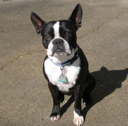

In [42]:
im = Image.open(dest)
im.to_thumb(128,128)

In [21]:
dest

'/images/boston-terries.jpg'

Funkcja pobrała zdjęcie bostona i zapisała w folderze images. Teraz pobierzemy wszystkie zdjęcia i zapiszemy w odpowiednich folderach.

In [5]:
dogs_types = 'boston-terrier','french-bulldog','pug'
path = Path('dogs')

In [6]:
if not path.exists():
  path.mkdir()

In [48]:
for dog in dogs_types:
  print(dog)
  dest = (path/dog)
  dest.mkdir(exist_ok=True)
  results = search_images_bing(key, f'dog {dog}')
  download_images(dest, urls=results.attrgot('contentUrl'))

boston-terrier
french-bulldog
pug


In [7]:
fns = get_image_files(path)

In [8]:
fns

(#410) [Path('dogs/boston-terrier/00000036.jpg'),Path('dogs/boston-terrier/00000052.jpg'),Path('dogs/boston-terrier/00000006.jpg'),Path('dogs/boston-terrier/00000059.jpg'),Path('dogs/boston-terrier/00000055.jpg'),Path('dogs/boston-terrier/00000118.jpg'),Path('dogs/boston-terrier/00000110.jpg'),Path('dogs/boston-terrier/00000070.jpg'),Path('dogs/boston-terrier/00000044.jpg'),Path('dogs/boston-terrier/00000011.jpg')...]

In [58]:
# weryfikacja czy któreś pliki są uszkodzone
failed = verify_images(fns)
failed

(#0) []

In [59]:
# usuwanie uszkodzonych obrazów
failed.map(Path.unlink)

(#0) []

##### Pomocne z Jupyter Notebook

In [62]:
??verify_images

In [61]:
?verify_images

In [63]:
doc(verify_images)

#### Obiekt DataLoaders

In [10]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # typy danych dla zmiennej: niezaleźnej, zależnej
    get_items=get_image_files,            # informujemy klasę w jaki sposób pozyskać listę plików
    splitter=RandomSplitter(valid_pct=0.2, seed=2022), # ile procent naszych danych to zbiór walidacyjny
    get_y=parent_label,                   # etykiety do danych pobierany z nazw folderów
    item_tfms=Resize(128)                 # jakiej transformacji obrazów używamy - resize do 128x128
)

Dzięki powyższemu mamy obiekt DataBlock, który jest szablonem do tworzenia obiektów DataLoaders. Teraz musimy przekazać informację o rzeczywistej ścieżce dostępu do plików.

In [11]:
dls = dogs.dataloaders(path)

In [12]:
dls

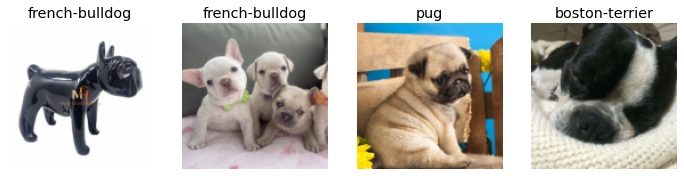

In [16]:
dls.train.show_batch(max_n=4, nrows=1)

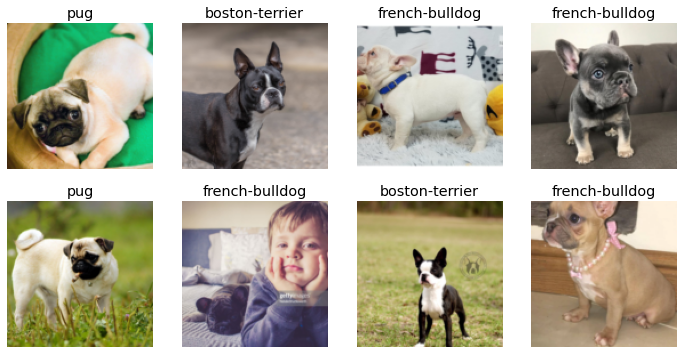

In [18]:
dls.valid.show_batch(max_n=8, nrows=2)

Resize ściśnięcie i rozciągnięcie.

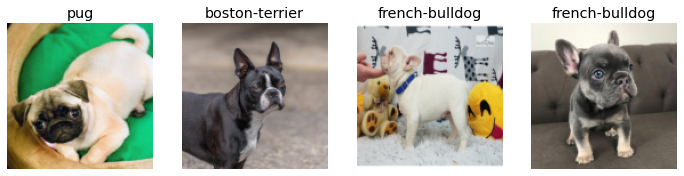

In [19]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish)) # rozciąganie / ściskanie
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Resize z wypełnianiem zerami z góry i z dołu

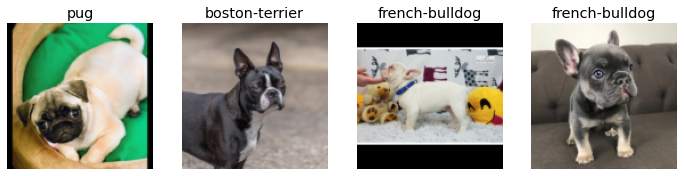

In [20]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # dopełnianie zerami
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Problemy z takim przetwarzaniem obrazów:
* przycinamy - możemy usunąć części zdjęcia pozwalające na rozpoznanie rasy
* rozciąganie / ściskanie - uzyskujemy nierealistyczne kształty
* dopełnianie zerami - dodajemy zbędną przestrzeń, którą GPU musi przetworzyć, co jest stratą czasu i mocy obliczeniowej

W praktyce, w każdej epoce wybieramy losową część obrazu, która jest przycinana.

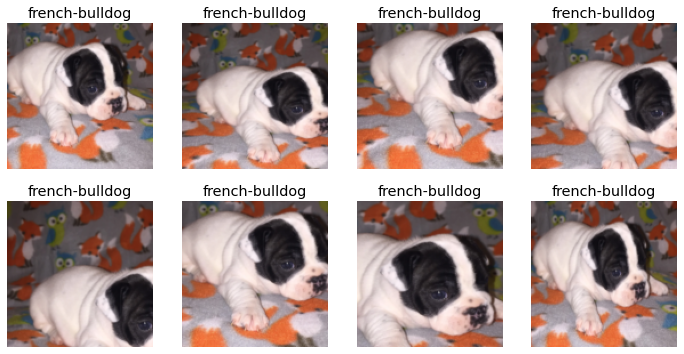

In [24]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # randomowe przycięcie zdjęcia
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Tym samym dostajemy też generator sztucznych zdjęć.